# EDA

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import datetime

In [3]:
df1 = pd.read_csv('../data/cleaned/campus1.csv', index_col='Timestamp')
df1.index = pd.to_datetime(df1.index)
df2 = pd.read_csv('../data/cleaned/campus2.csv', index_col='Timestamp')
df2.index = pd.to_datetime(df2.index)
df3 = pd.read_csv('../data/cleaned/campus3.csv', index_col='Timestamp')
df3.index = pd.to_datetime(df3.index)
df4 = pd.read_csv('../data/cleaned/campus4.csv', index_col='Timestamp')
df4.index = pd.to_datetime(df4.index)
df5 = pd.read_csv('../data/cleaned/campus5.csv', index_col='Timestamp')
df5.index = pd.to_datetime(df5.index)

In [4]:
def info_for_df(df):
    '''
    Function designed to quickly give back the shape, null values, and if there are any duplicated indexes to look
    for any anomolies or mistakes in the merging process from before. Also, to get a sense of the data.
    '''
    print('Shape:')
    print(df.shape)
    print('='*50)
    print('Null Values:')
    print(df.isnull().sum())
    print('='*50)
    print('Duplicated Indexes:')
    print(df.index.duplicated().sum())

### Campus 1

In [5]:
info_for_df(df1)

Shape:
(79805, 9)
Null Values:
CampusKey                  0
SolarGeneration            0
time                       0
ApparentTemperature    14605
AirTemperature         14605
DewPointTemperature    14605
RelativeHumidity       14605
WindSpeed              29300
WindDirection          29300
dtype: int64
Duplicated Indexes:
0


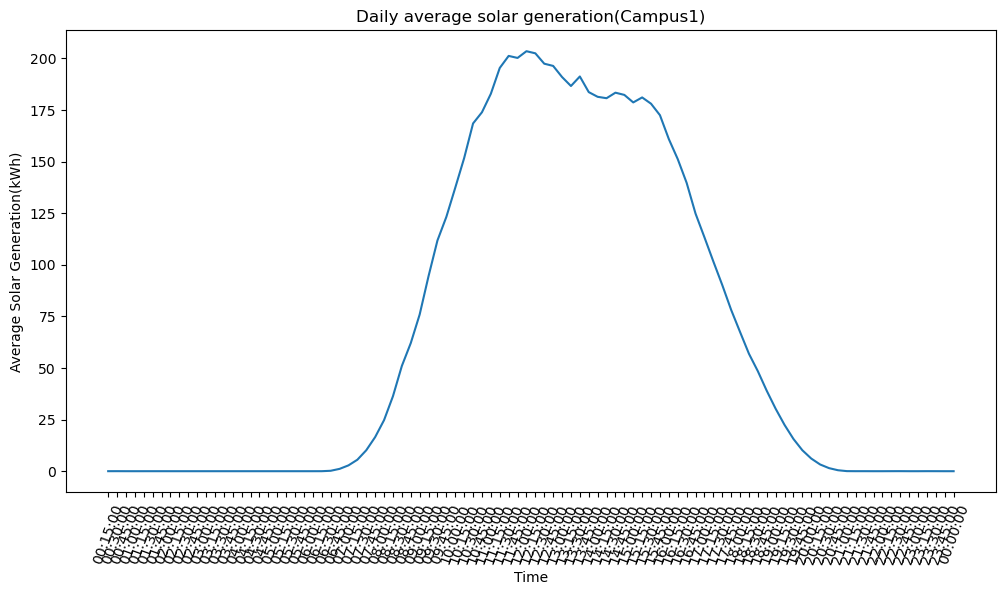

In [6]:
xaxis=df1['time'].unique()
yaxis=df1.groupby(['time'])['SolarGeneration'].mean()

plt.figure(figsize = (12,6))
plt.plot(xaxis,yaxis)

plt.title("Daily average solar generation(Campus1)")
plt.xlabel("Time")
plt.ylabel("Average Solar Generation(kWh)")
plt.xticks(rotation=70)
plt.show()

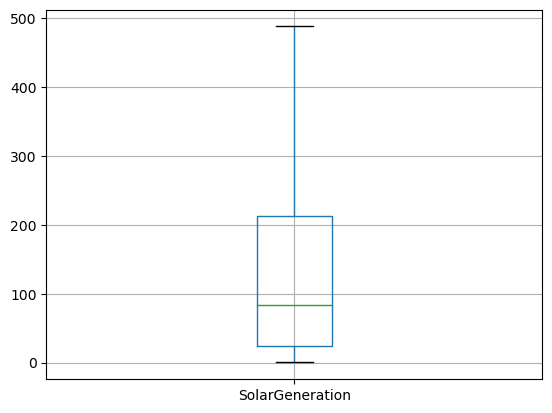

In [7]:
df1box = df1[df1['SolarGeneration']!=0]
df1box[['SolarGeneration']].boxplot();

### Campus 2

In [8]:
info_for_df(df2)

Shape:
(79319, 9)
Null Values:
CampusKey                  0
SolarGeneration            0
time                       0
ApparentTemperature    12627
AirTemperature         12627
DewPointTemperature    12627
RelativeHumidity       12627
WindSpeed              25758
WindDirection          25758
dtype: int64
Duplicated Indexes:
0


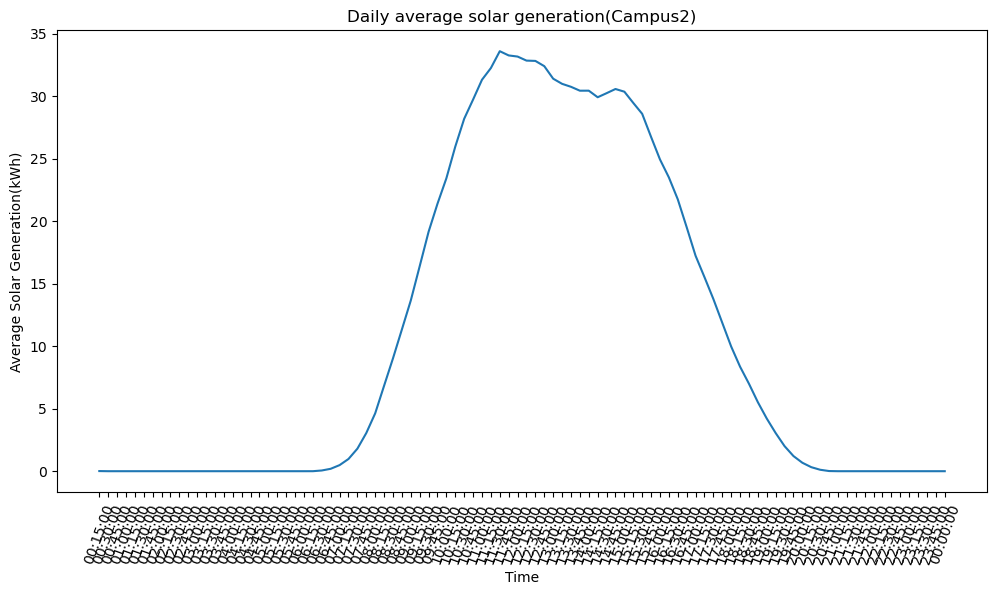

In [9]:
xaxis=df2['time'].unique()
yaxis=df2.groupby(['time'])['SolarGeneration'].mean()

plt.figure(figsize = (12,6))
plt.plot(xaxis,yaxis)

plt.title("Daily average solar generation(Campus2)")
plt.xlabel("Time")
plt.ylabel("Average Solar Generation(kWh)")
plt.xticks(rotation=70)
plt.show()

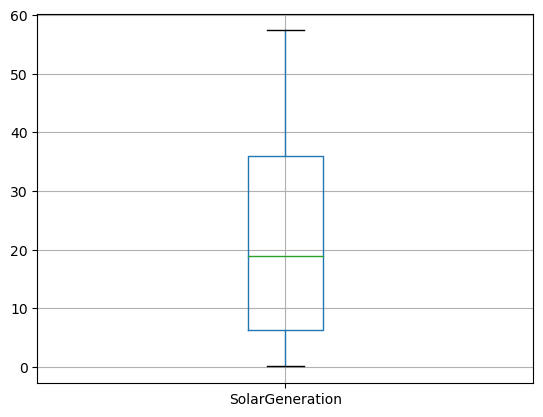

In [10]:
df2box = df2[df2['SolarGeneration']!=0]
df2box[['SolarGeneration']].boxplot();

### Campus 3

In [11]:
info_for_df(df3)

Shape:
(79319, 9)
Null Values:
CampusKey                  0
SolarGeneration            0
time                       0
ApparentTemperature     8682
AirTemperature          8682
DewPointTemperature     8682
RelativeHumidity        8682
WindSpeed              17754
WindDirection          17754
dtype: int64
Duplicated Indexes:
0


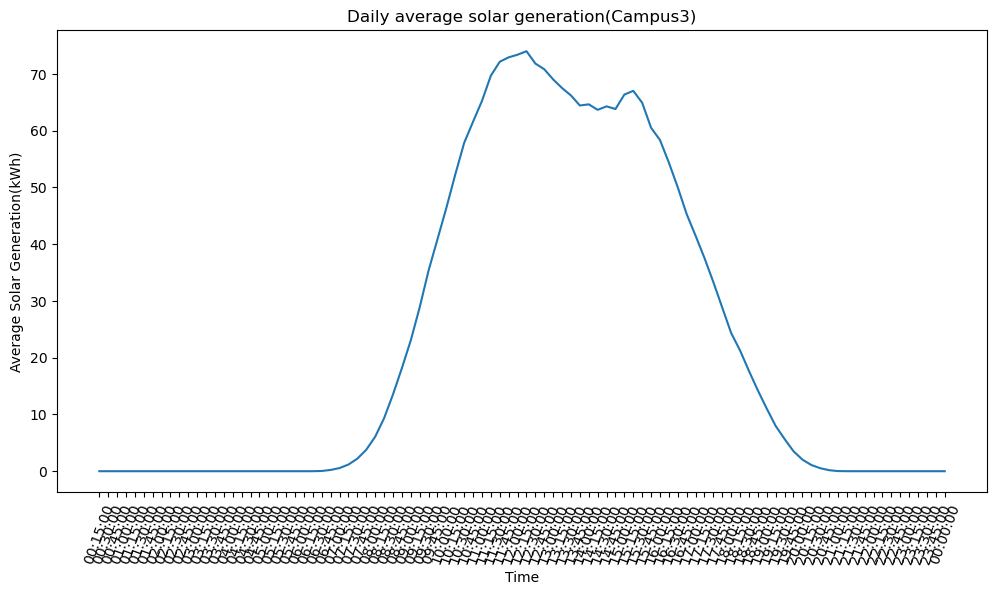

In [12]:
xaxis=df3['time'].unique()
yaxis=df3.groupby(['time'])['SolarGeneration'].mean()

plt.figure(figsize = (12,6))
plt.plot(xaxis,yaxis)

plt.title("Daily average solar generation(Campus3)")
plt.xlabel("Time")
plt.ylabel("Average Solar Generation(kWh)")
plt.xticks(rotation=70)
plt.show()

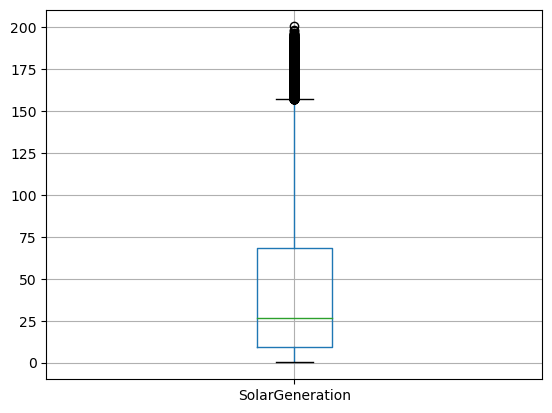

In [13]:
df3box = df3[df3['SolarGeneration']!=0]
df3box[['SolarGeneration']].boxplot();

### Campus 4

In [14]:
info_for_df(df4)

Shape:
(79319, 9)
Null Values:
CampusKey                  0
SolarGeneration            0
time                       0
ApparentTemperature    34809
AirTemperature         34809
DewPointTemperature    34809
RelativeHumidity       34809
WindSpeed              43987
WindDirection          43987
dtype: int64
Duplicated Indexes:
0


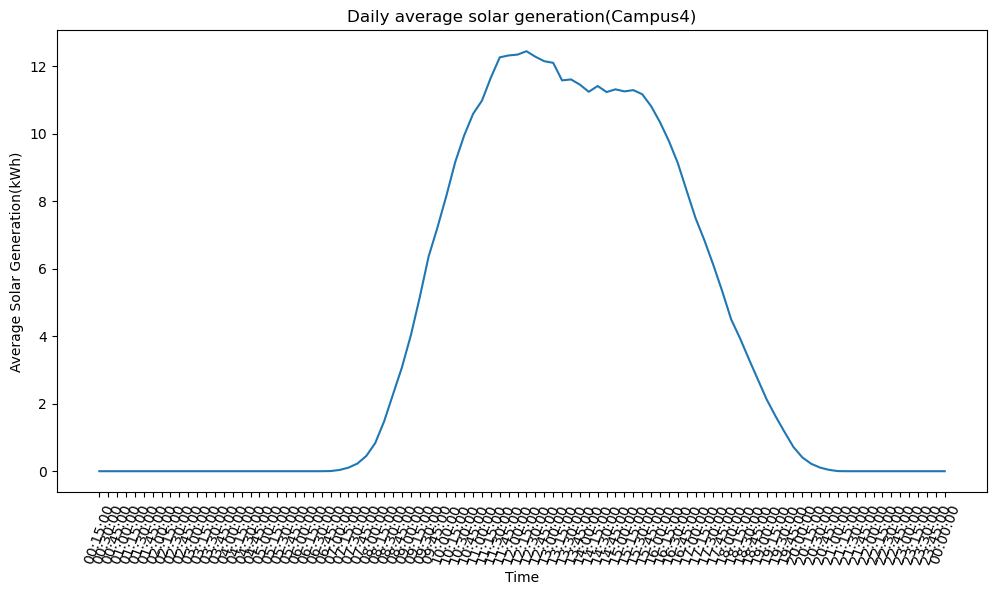

In [15]:
xaxis=df4['time'].unique()
yaxis=df4.groupby(['time'])['SolarGeneration'].mean()

plt.figure(figsize = (12,6))
plt.plot(xaxis,yaxis)

plt.title("Daily average solar generation(Campus4)")
plt.xlabel("Time")
plt.ylabel("Average Solar Generation(kWh)")
plt.xticks(rotation=70)
plt.show()

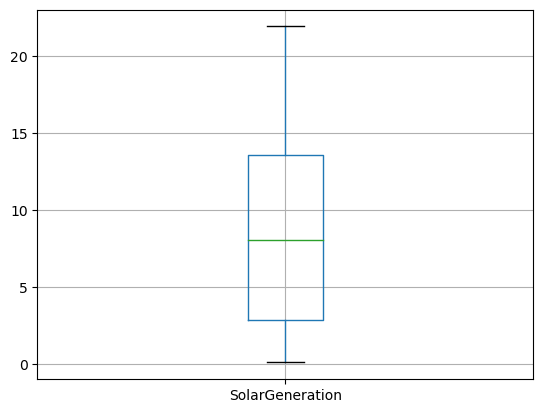

In [16]:
df4box = df4[df4['SolarGeneration']!=0]
df4box[['SolarGeneration']].boxplot();

### Campus 5

In [17]:
info_for_df(df5)

Shape:
(79319, 9)
Null Values:
CampusKey                  0
SolarGeneration            0
time                       0
ApparentTemperature    67273
AirTemperature         67273
DewPointTemperature    67273
RelativeHumidity       67273
WindSpeed              76438
WindDirection          76438
dtype: int64
Duplicated Indexes:
0


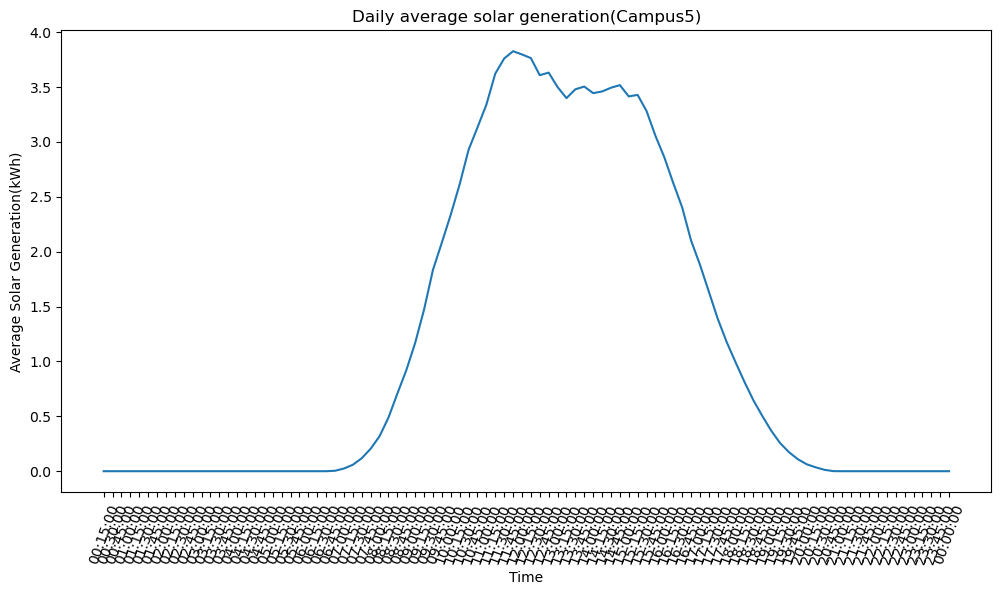

In [18]:
xaxis=df5['time'].unique()
yaxis=df5.groupby(['time'])['SolarGeneration'].mean()

plt.figure(figsize = (12,6))
plt.plot(xaxis,yaxis)

plt.title("Daily average solar generation(Campus5)")
plt.xlabel("Time")
plt.ylabel("Average Solar Generation(kWh)")
plt.xticks(rotation=70)
plt.show()

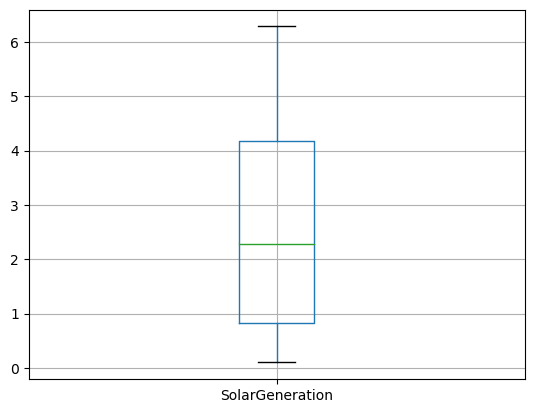

In [19]:
df5box = df5[df5['SolarGeneration']!=0]
df5box[['SolarGeneration']].boxplot();

In [20]:
df5['SolarGeneration'].max()

6.28125

---

The daily mean demonstrates that Campus 5 seems to be the most normally shaped. Thus, the model will trained on Campus 5 to determine if the resulting model can be utilized (once re-trained) on both other campuses and other sites within different campuses.

---

### Investigating the Summer and Winter Season for Campus 5:

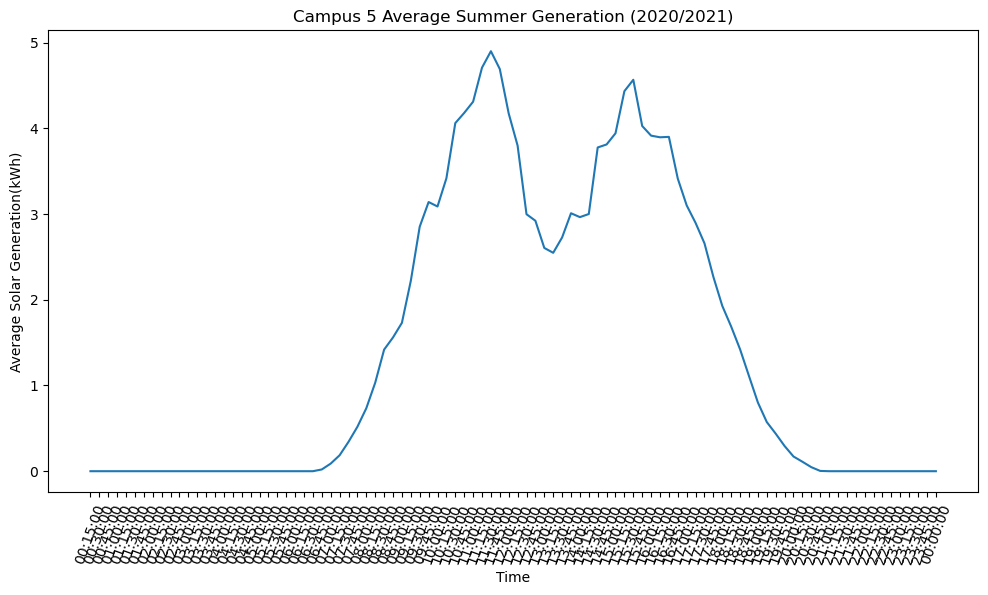

In [202]:
summer21 = df5[(df5.index>'2020-11-01 00:00:00') & (df5.index<'2021-02-01 00:00:00')].copy()

xaxis=summer21['time'].unique()
yaxis=summer21.groupby(['time'])['SolarGeneration'].mean()

plt.figure(figsize = (12,6))
plt.plot(xaxis,yaxis)

plt.title("Campus 5 Average Summer Generation (2020/2021)")
plt.xlabel("Time")
plt.ylabel("Average Solar Generation(kWh)")
plt.xticks(rotation=70)
plt.show()

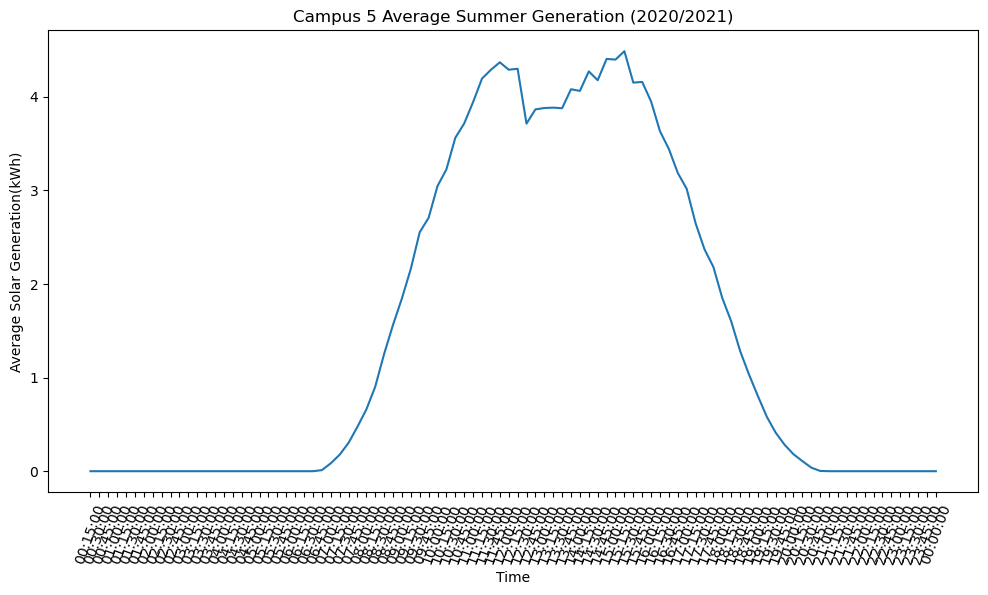

In [203]:
summer22 = df5[(df5.index>'2021-11-01 00:00:00') & (df5.index<'2022-02-01 00:00:00')].copy()

xaxis=summer22['time'].unique()
yaxis=summer22.groupby(['time'])['SolarGeneration'].mean()

plt.figure(figsize = (12,6))
plt.plot(xaxis,yaxis)

plt.title("Campus 5 Average Summer Generation (2020/2021)")
plt.xlabel("Time")
plt.ylabel("Average Solar Generation(kWh)")
plt.xticks(rotation=70)
plt.show()

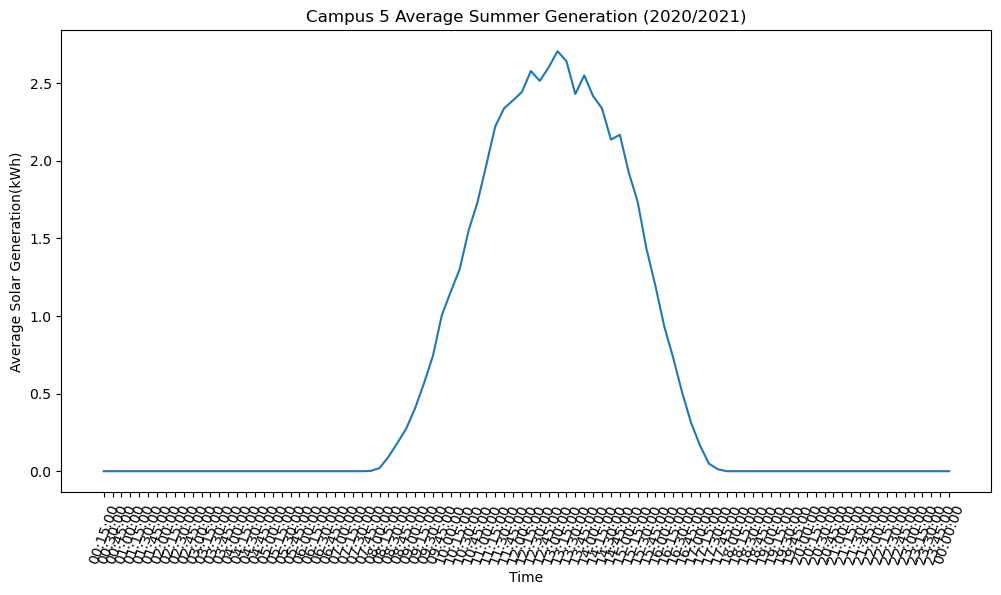

In [204]:
winter21 = df5[(df5.index>'2021-05-01 00:00:00') & (df5.index<'2021-07-01 00:00:00')].copy()

xaxis=winter21['time'].unique()
yaxis=winter21.groupby(['time'])['SolarGeneration'].mean()

plt.figure(figsize = (12,6))
plt.plot(xaxis,yaxis)

plt.title("Campus 5 Average Summer Generation (2020/2021)")
plt.xlabel("Time")
plt.ylabel("Average Solar Generation(kWh)")
plt.xticks(rotation=70)
plt.show()

---

### Investigating the Auto- and Partial Auto-correlation of Campus 5
> Both the 15-min interval and the hourly resampled data will be investigated

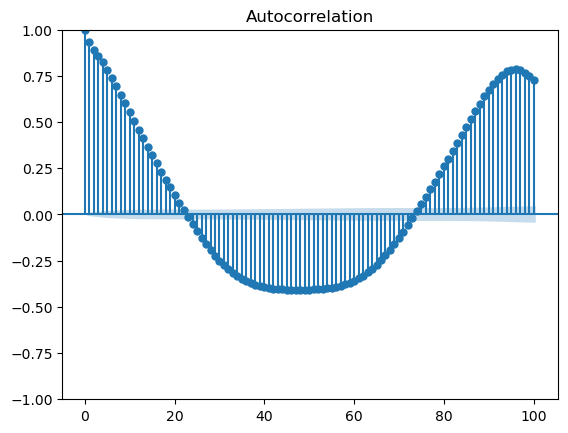

In [205]:
plot_acf(df5['SolarGeneration'], lags = 100);

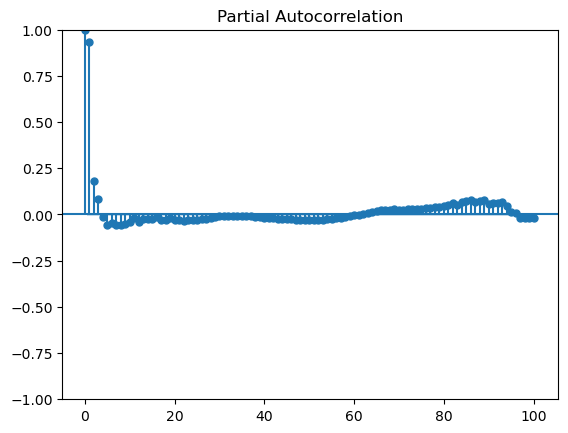

In [206]:
plot_pacf(df5['SolarGeneration'], lags = 100, method = 'ywm');

In [207]:
# Creating the lagged columns determined by the partial autocorrelation and exported to be modeled
camp5 = df5[['SolarGeneration']].copy()
camp5['lag1'] = camp5['SolarGeneration'].shift(1)
camp5['lag2'] = camp5['SolarGeneration'].shift(2)
camp5['lag3'] = camp5['SolarGeneration'].shift(3)
camp5['lag5'] = camp5['SolarGeneration'].shift(5)
camp5['lag6'] = camp5['SolarGeneration'].shift(6)
camp5['lag86'] = camp5['SolarGeneration'].shift(86)
camp5.to_csv('../data/cleaned/camp5_shifted.csv')

### Hourly Investigation:

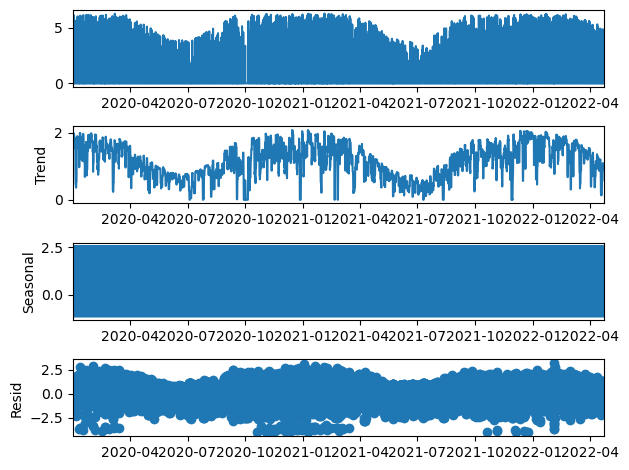

In [68]:
df5_hourly = df5[['SolarGeneration']]
df5_hourly = df5_hourly.resample('H').mean()
df5_hourly.dropna(inplace = True)
decomp = seasonal_decompose(df5_hourly)

decomp.plot();

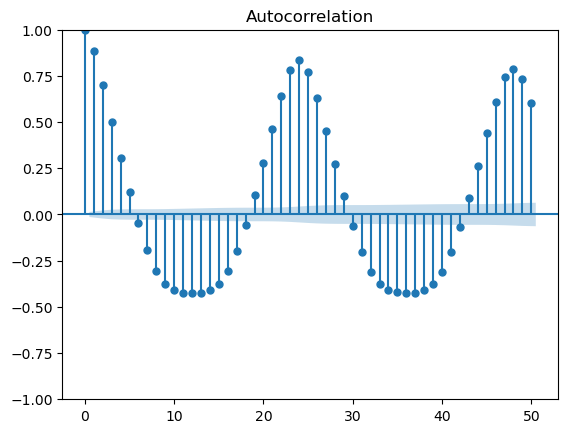

In [69]:
plot_acf(df5_hourly, lags = 50);

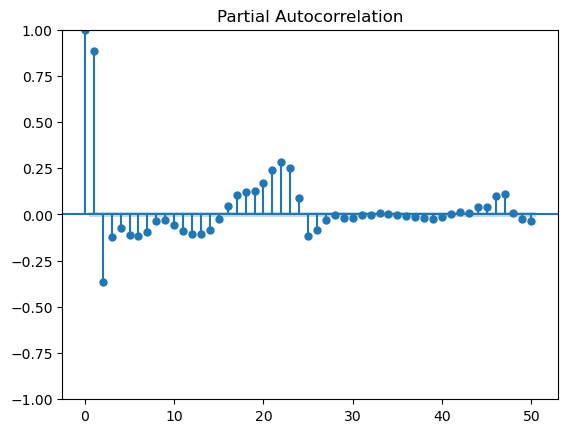

In [70]:
plot_pacf(df5_hourly, lags = 50, method = 'ywm');

In [72]:
# Creating the lagged columns determined by the partial autocorrelation and exported to be modeled
df5_hourly['lag1'] = df5_hourly['SolarGeneration'].shift(1)
df5_hourly['lag2'] = df5_hourly['SolarGeneration'].shift(2)
df5_hourly['seasonal_21'] = df5_hourly['SolarGeneration'].shift(21)
df5_hourly['seasonal_22'] = df5_hourly['SolarGeneration'].shift(22)
df5_hourly['seasonal_23'] = df5_hourly['SolarGeneration'].shift(23)
df5_hourly.to_csv('../data/cleaned/camp5hourly_shifted.csv')

---
Investigating the Individual Sites on Campus 3  

--- 

In [24]:
site6 = pd.read_csv('../data/cleaned/campus3_site6.csv', index_col='Timestamp')
site6.index = pd.to_datetime(site6.index)
site8 = pd.read_csv('../data/cleaned/campus3_site8.csv', index_col='Timestamp')
site8.index = pd.to_datetime(site8.index)
site10 = pd.read_csv('../data/cleaned/campus3_site10.csv', index_col='Timestamp')
site10.index = pd.to_datetime(site10.index)
site12 = pd.read_csv('../data/cleaned/campus3_site12.csv', index_col='Timestamp')
site12.index = pd.to_datetime(site12.index)

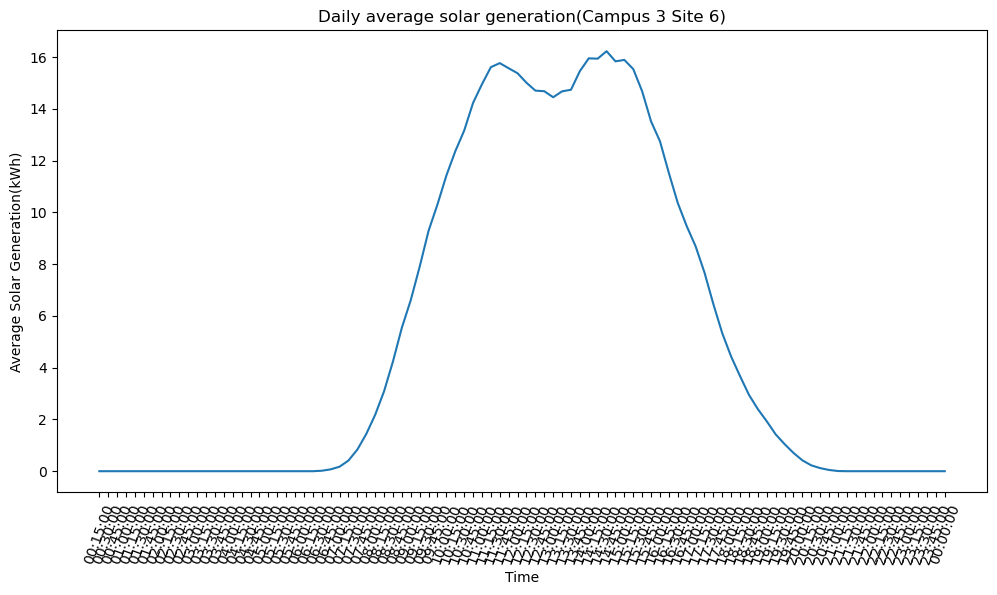

In [208]:
xaxis=site6['time'].unique()
yaxis=site6.groupby(['time'])['SolarGeneration'].mean()

plt.figure(figsize = (12,6))
plt.plot(xaxis,yaxis)

plt.title("Daily average solar generation(Campus 3 Site 6)")
plt.xlabel("Time")
plt.ylabel("Average Solar Generation(kWh)")
plt.xticks(rotation=70)
plt.show()

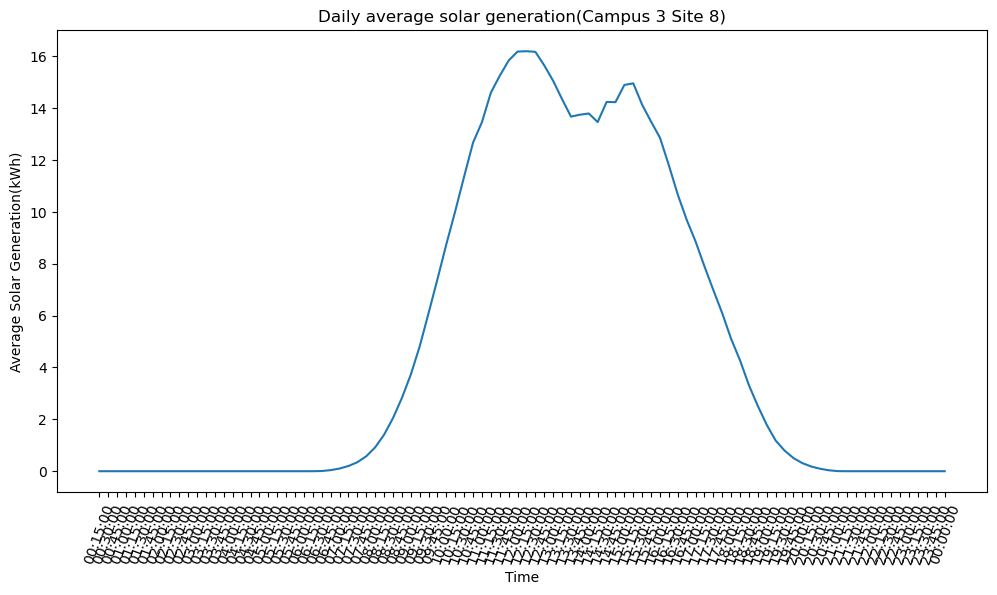

In [209]:
xaxis=site8['time'].unique()
yaxis=site8.groupby(['time'])['SolarGeneration'].mean()

plt.figure(figsize = (12,6))
plt.plot(xaxis,yaxis)

plt.title("Daily average solar generation(Campus 3 Site 8)")
plt.xlabel("Time")
plt.ylabel("Average Solar Generation(kWh)")
plt.xticks(rotation=70)
plt.show()

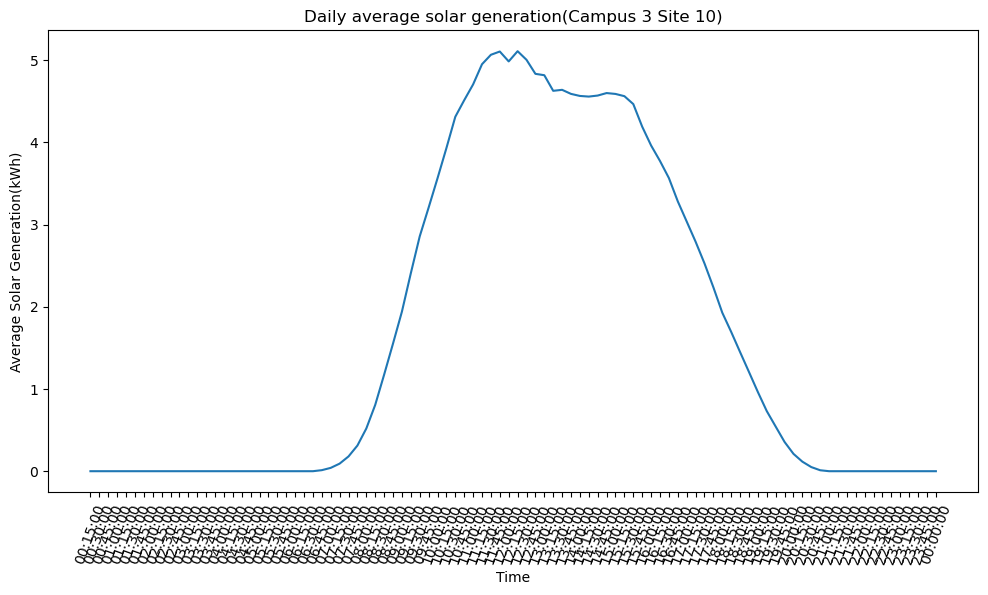

In [210]:
xaxis=site10['time'].unique()
yaxis=site10.groupby(['time'])['SolarGeneration'].mean()

plt.figure(figsize = (12,6))
plt.plot(xaxis,yaxis)

plt.title("Daily average solar generation(Campus 3 Site 10)")
plt.xlabel("Time")
plt.ylabel("Average Solar Generation(kWh)")
plt.xticks(rotation=70)
plt.show()

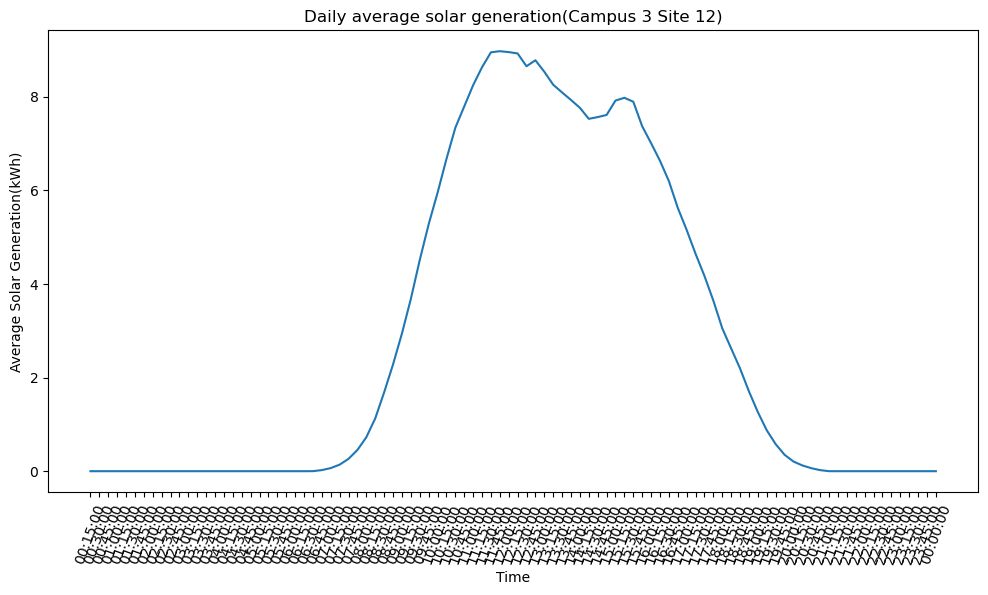

In [211]:
xaxis=site12['time'].unique()
yaxis=site12.groupby(['time'])['SolarGeneration'].mean()

plt.figure(figsize = (12,6))
plt.plot(xaxis,yaxis)

plt.title("Daily average solar generation(Campus 3 Site 12)")
plt.xlabel("Time")
plt.ylabel("Average Solar Generation(kWh)")
plt.xticks(rotation=70)
plt.show()